# Explore here

## Step 1: Problem statement and data collection

Problem statement: predict the quality of red wine based on its chemical properties.

In [8]:
# Import dataset to start working with it
import pandas as pd

raw_data = pd.read_csv("../data/raw/winequality-red.csv", sep=";")
raw_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploration and data cleaning

In [9]:
print(f"Raw data shape: {raw_data.shape}")
print(raw_data.info())

Raw data shape: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


Looks like no null data entries.  Unlike what I'm reading in the lesson, looks like target column is not "label," it's instead "quality" where all scores are in range 3 to 8 (with vast majority being ranked as quality 5, 6, or 7)

None of the columns look irrelevant to the point where I'd recommend dropping them.  May need to find duplicates, though:

In [10]:
raw_data.drop_duplicates(inplace=True)
print(raw_data.shape)
raw_data.head()

(1359, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


## Analysis of univariate variables
### Categorical variables
The only categorical variable I recognize here is the quality, our target variable
### Numeric variables


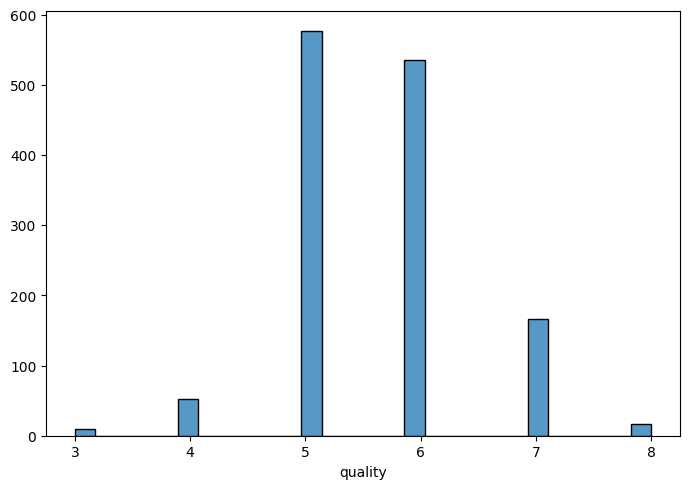

In [12]:
# histogram-plot each categorical variable

import matplotlib.pyplot as plt
import seaborn as sns

categorical_variables = [
    "quality",
]

fig, axis = plt.subplots(1, 1, figsize=(7, 5))

# Create a multiple histogram
sns.histplot(data=raw_data, x="quality").set(ylabel=None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


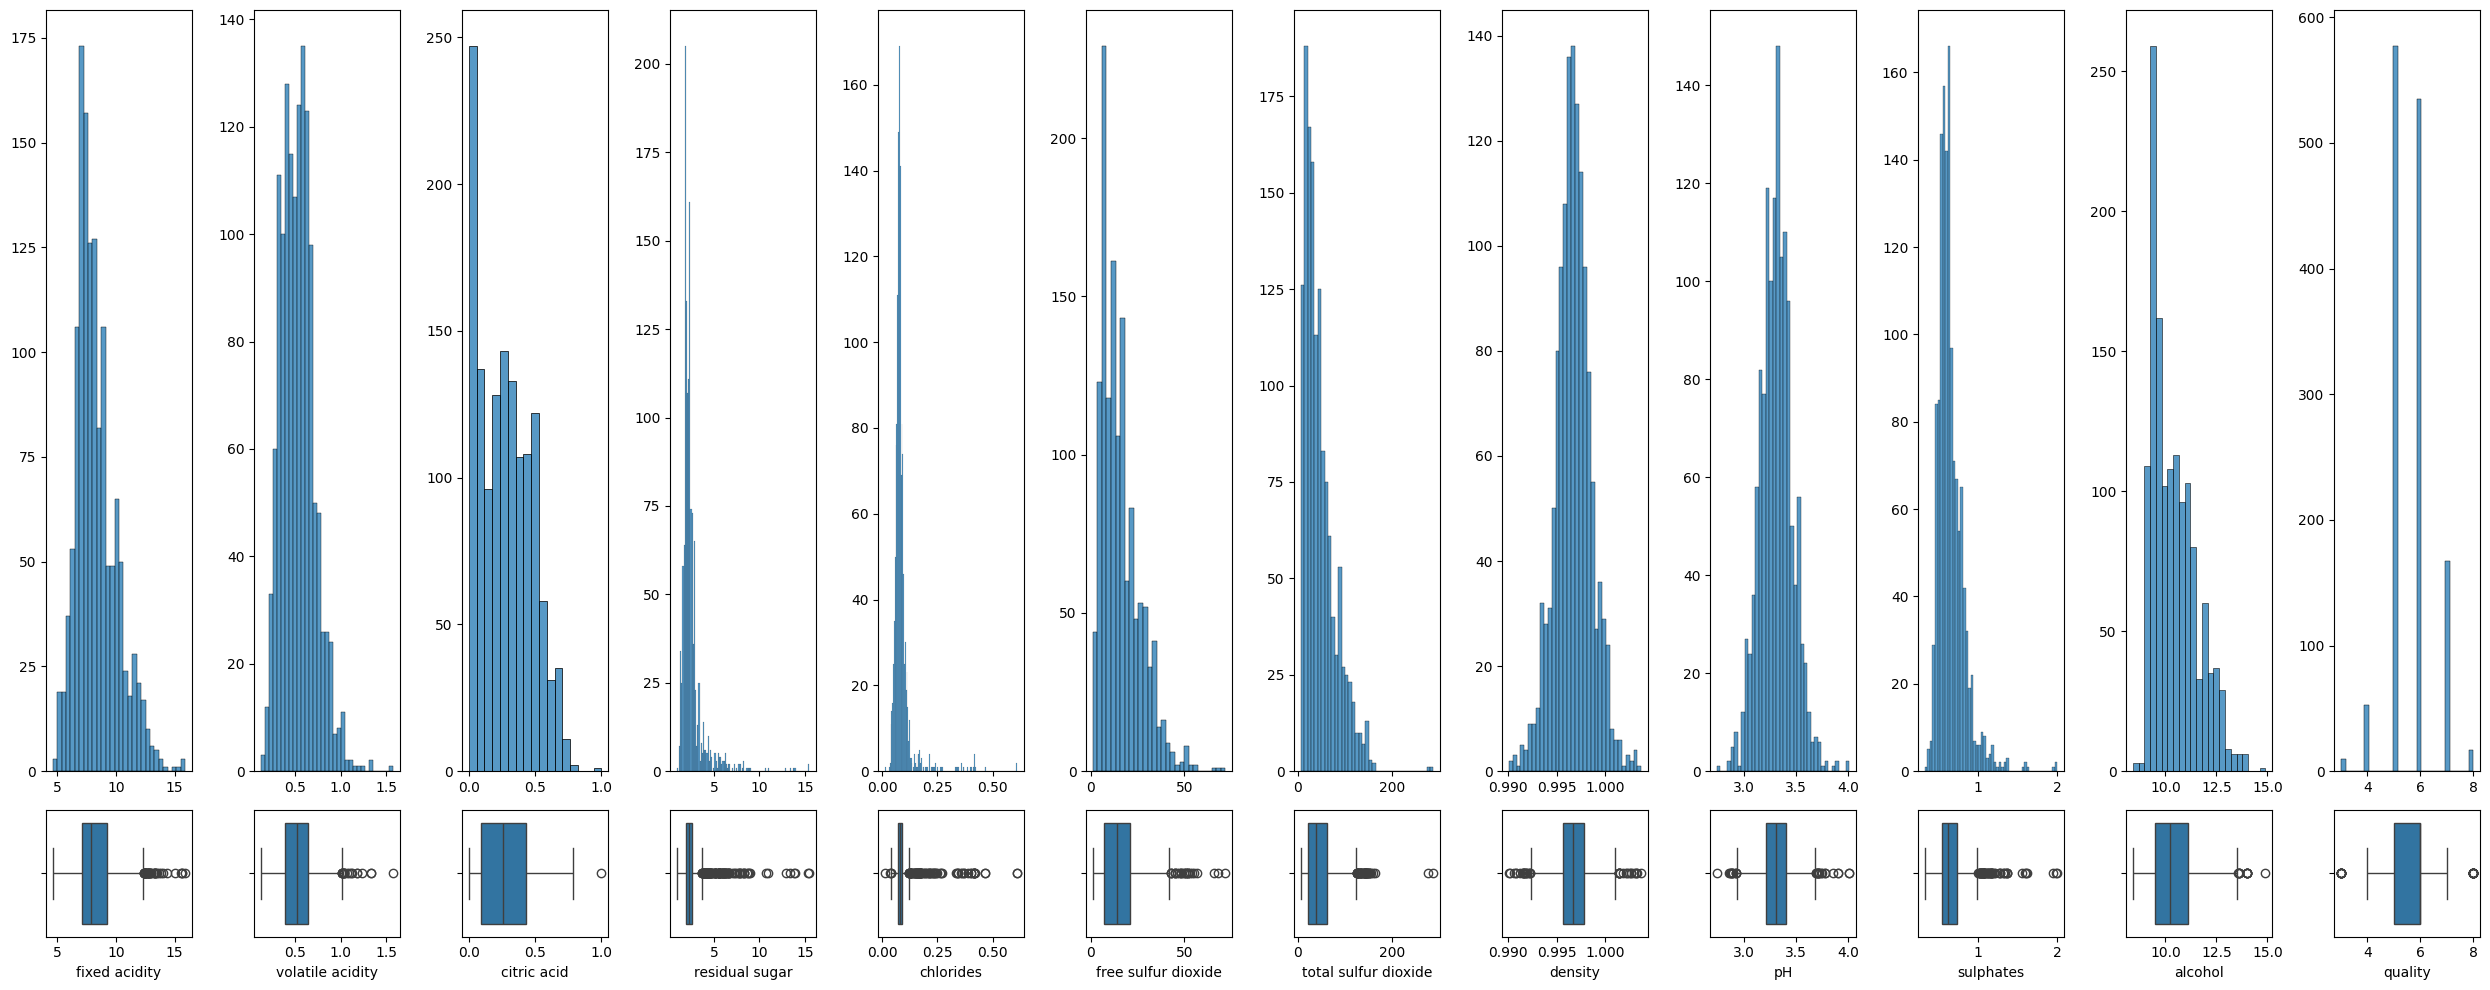

In [ ]:
numeric_variables = raw_data.columns[~raw_data.columns.isin(categorical_variables)]
var_to_boxchart = raw_data.columns  # normally would only do this charting type for non-categoricals, but our Outcome column is numeric enough already

fig, axis = plt.subplots(
    2, len(vars_to_boxchart), figsize=(25, 10), gridspec_kw={"height_ratios": [6, 1]}
)

# Creating a multiple figure with histograms and box plots
temp_column_index = 0
for each_numeric_variable in vars_to_boxchart:
    sns.histplot(
        ax=axis[0, temp_column_index], data=raw_data, x=f"{each_numeric_variable}"
    ).set(xlabel=None, ylabel=None)
    sns.boxplot(
        ax=axis[1, temp_column_index], data=raw_data, x=f"{each_numeric_variable}"
    )
    temp_column_index += 1

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Our boxchart shows we have few-enough quality scores outside the 4 to 7 range that they could be considered outliers, but subjectively I think they're close enough to in-range and sonsistent-enough with a typical bell curve on the histogram that we should keep them.

## Numerical-numerical analysis

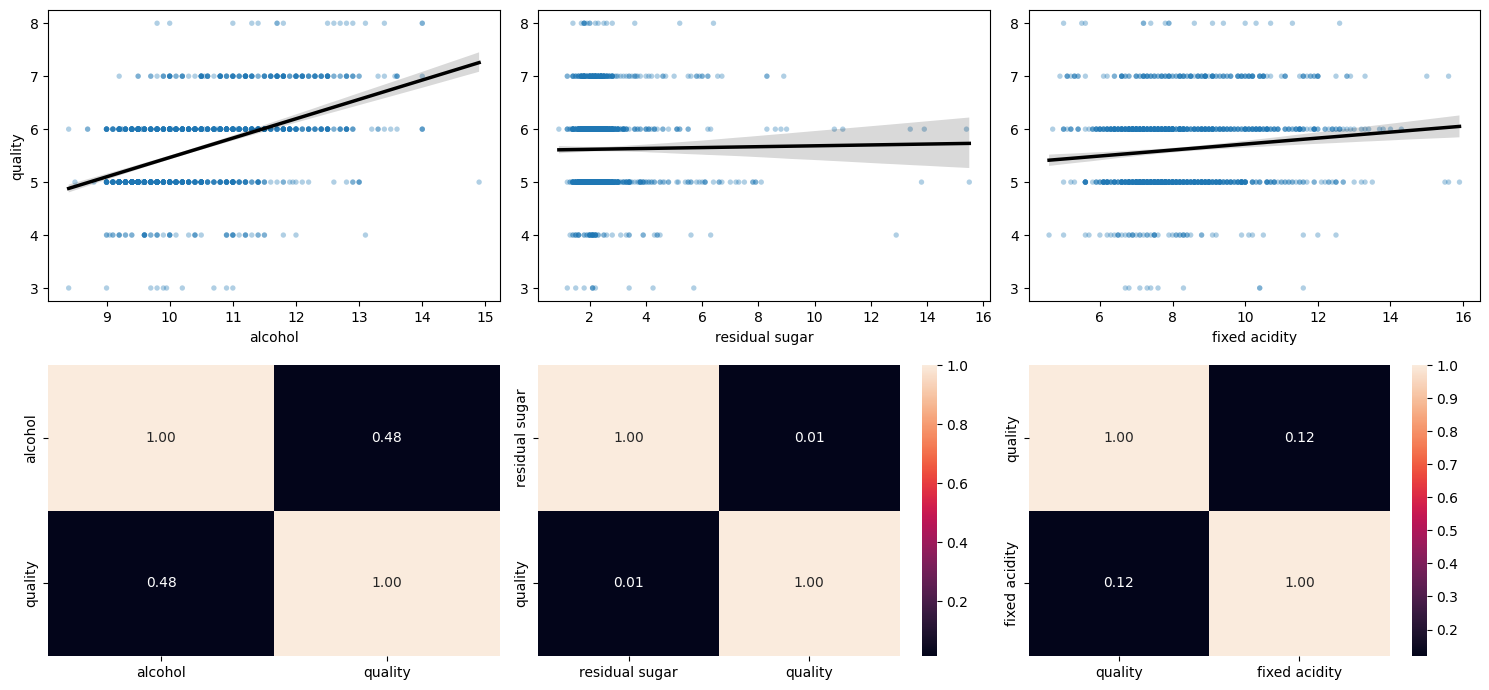

In [14]:
fig, axis = plt.subplots(2, 3, figsize=(15, 7))

# Create a multiple scatter diagram
common_scatter = {"s": 15, "alpha": 0.35, "edgecolor": "none"}
common_line = {"color": "black", "lw": 2.5, "zorder": 5}

sns.regplot(
    ax=axis[0, 0],
    data=raw_data,
    x="alcohol",
    y="quality",
    scatter_kws=common_scatter,
    line_kws=common_line,
)
sns.heatmap(
    raw_data[["alcohol", "quality"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 0],
    cbar=False,
)

sns.regplot(
    ax=axis[0, 1],
    data=raw_data,
    x="residual sugar",
    y="quality",
    scatter_kws=common_scatter,
    line_kws=common_line,
).set(ylabel=None)
sns.heatmap(
    raw_data[["residual sugar", "quality"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 1],
)

sns.regplot(
    ax=axis[0, 2],
    data=raw_data,
    x="fixed acidity",
    y="quality",
    scatter_kws=common_scatter,
    line_kws=common_line,
).set(ylabel=None)
sns.heatmap(
    raw_data[["quality", "fixed acidity"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 2],
)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Looks like the amount of alcohol content in a wine has much more of an influence on its quality rating vs. the amount of residual sugar or volatile acidity.

## Numerical-categorical analysis

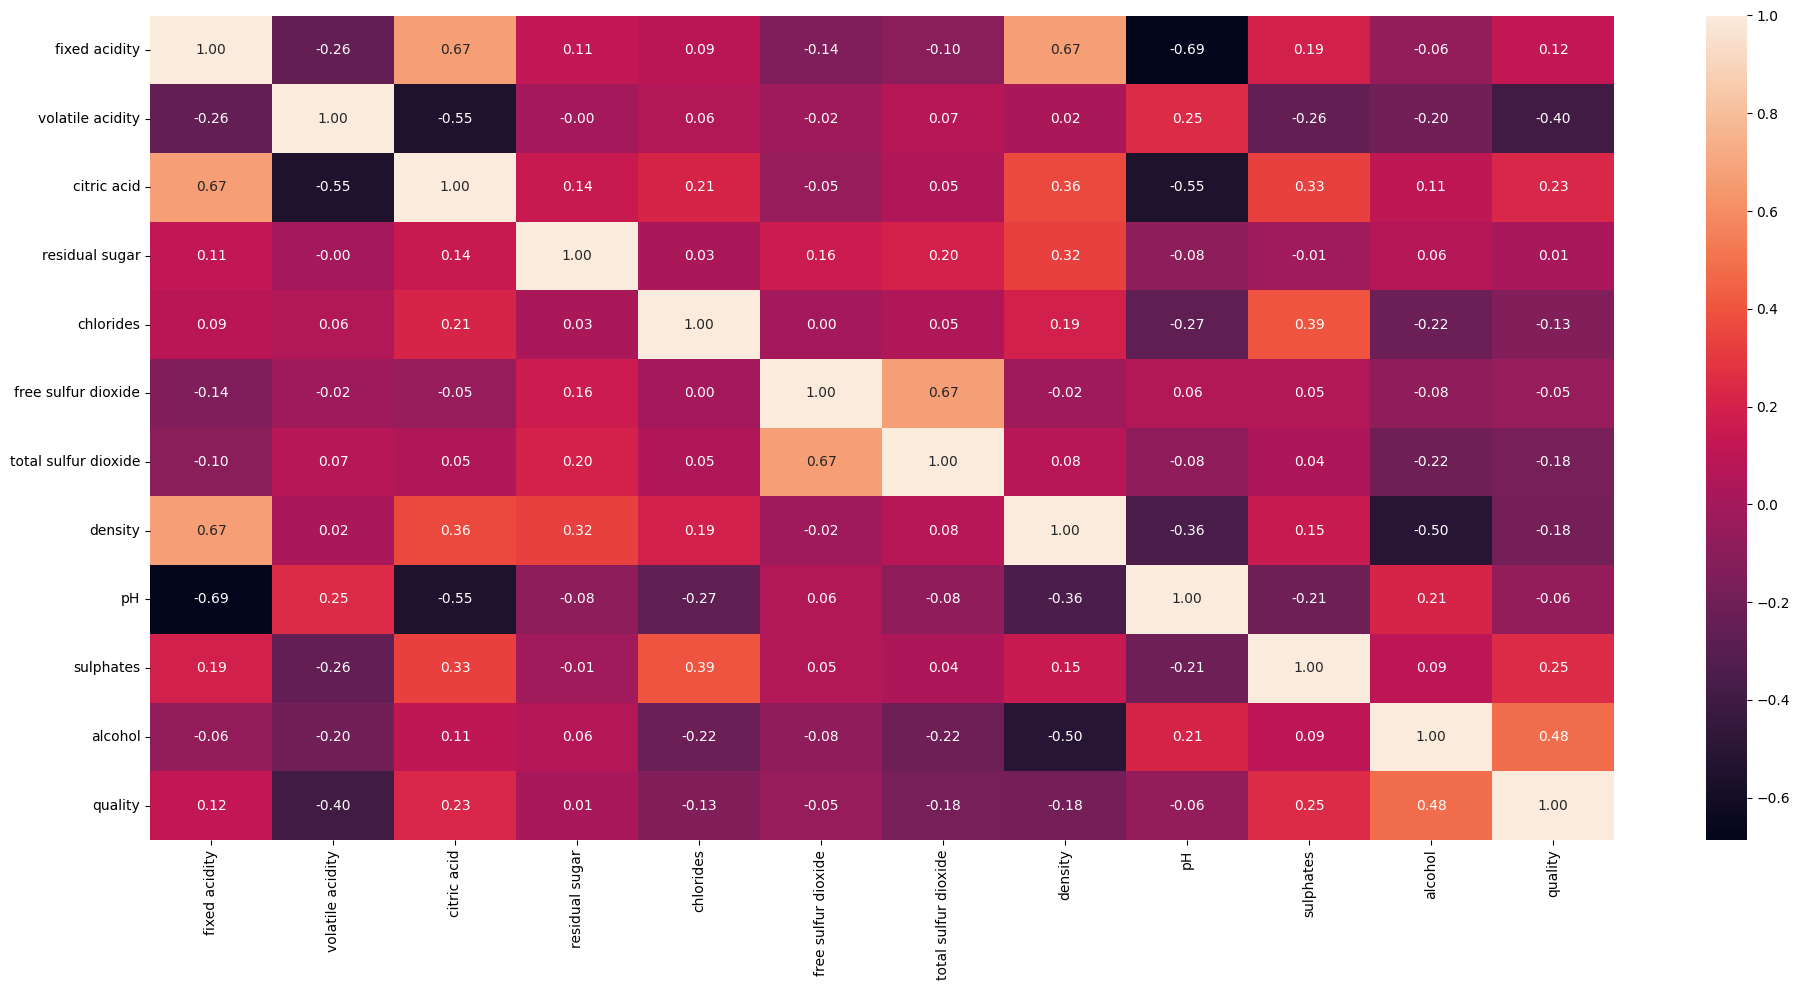

In [15]:
fig, axis = plt.subplots(figsize=(20, 10))

sns.heatmap(
    raw_data[list(raw_data.columns)].corr(),
    annot=True,
    fmt=".2f",
)

plt.tight_layout()

plt.show()


The most strongly correlated features to quality are alcohol content, sulphates, citric acid, and (inversely) acidity.

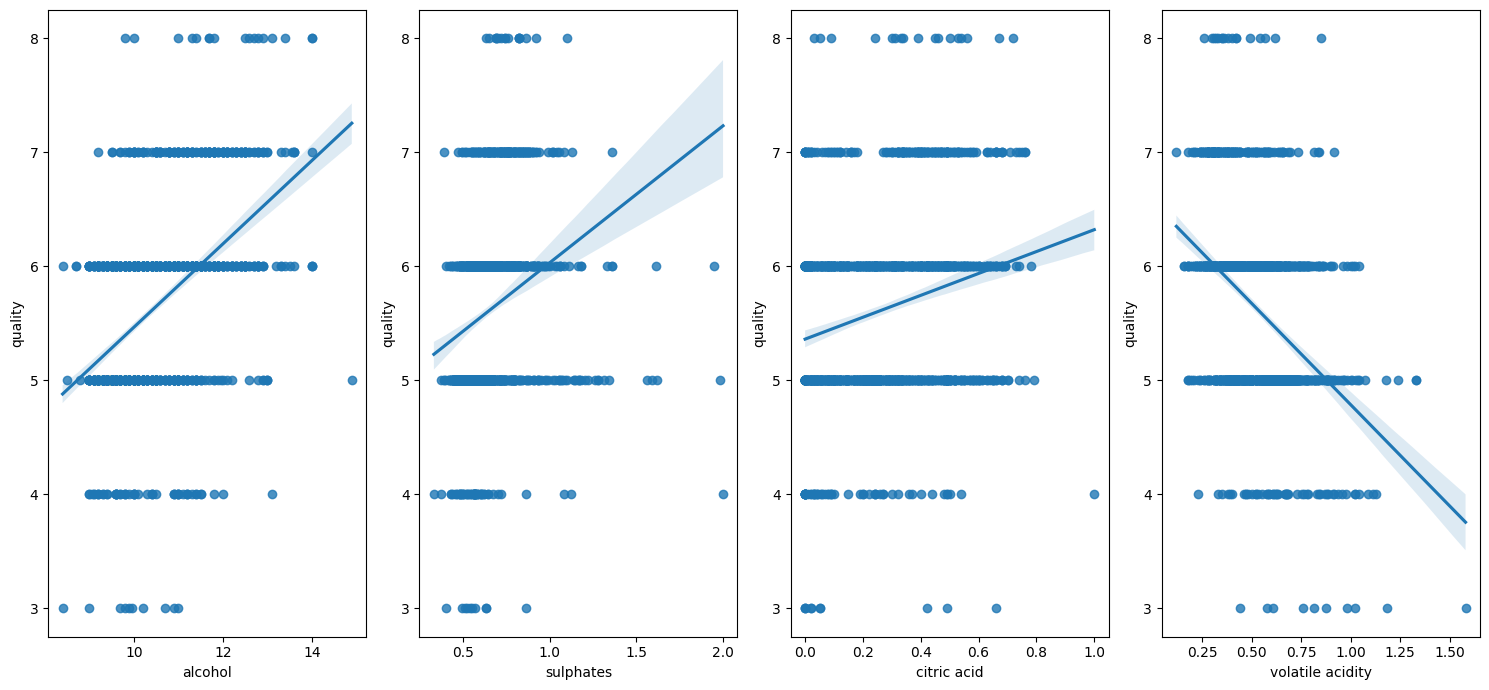

In [17]:
fig, axis = plt.subplots(figsize=(15, 7), ncols=4)

sns.regplot(ax=axis[0], data=raw_data, x="alcohol", y="quality")
sns.regplot(ax=axis[1], data=raw_data, x="sulphates", y="quality")
sns.regplot(ax=axis[2], data=raw_data, x="citric acid", y="quality")
sns.regplot(ax=axis[3], data=raw_data, x="volatile acidity", y="quality")

plt.tight_layout()

plt.show()


## Building our model

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = raw_data.drop("quality", axis=1)
y = raw_data["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6
1519,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2
452,6.8,0.56,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0
847,7.4,0.68,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0


### Scaling
Scaling is required for this model type to work as intended.  Choosing min-max beacuse some of these have order-of-magnitude different scales and ranges.

In [ ]:
# min-max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(
    X_train_scal, index=X_train.index, columns=numeric_variables
)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=numeric_variables)

X_train_scal.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,0.380531,0.154930,0.40,0.089041,0.093489,0.154930,0.077739,0.351689,0.456897,0.251497,0.646154
1519,0.176991,0.380282,0.08,0.116438,0.156928,0.183099,0.074205,0.483113,0.603448,0.149701,0.276923
452,0.194690,0.281690,0.03,0.054795,0.120200,0.239437,0.102473,0.494126,0.603448,0.179641,0.246154
847,0.247788,0.366197,0.16,0.061644,0.110184,0.154930,0.116608,0.560206,0.655172,0.221557,0.230769
58,0.283186,0.302817,0.18,0.095890,0.106845,0.225352,0.169611,0.545521,0.594828,0.155689,0.246154


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    raw_data,
    x="alcohol",
    y="sulphates",
    z="citric acid",
    color="quality",
    width=1000,
    height=500,
    size=raw_data["quality"].abs(),
    color_discrete_sequence=[
        "#A52A2A",
        "#D2691E",
        "#DAA520",
        "#90EE90",
        "#3CB371",
        "#2E8B57",
    ],
)
camera = dict(up=dict(x=1, y=3.5, z=0), eye=dict(x=2, y=0, z=0))

fig.update_layout(scene_camera=camera)
fig.show()


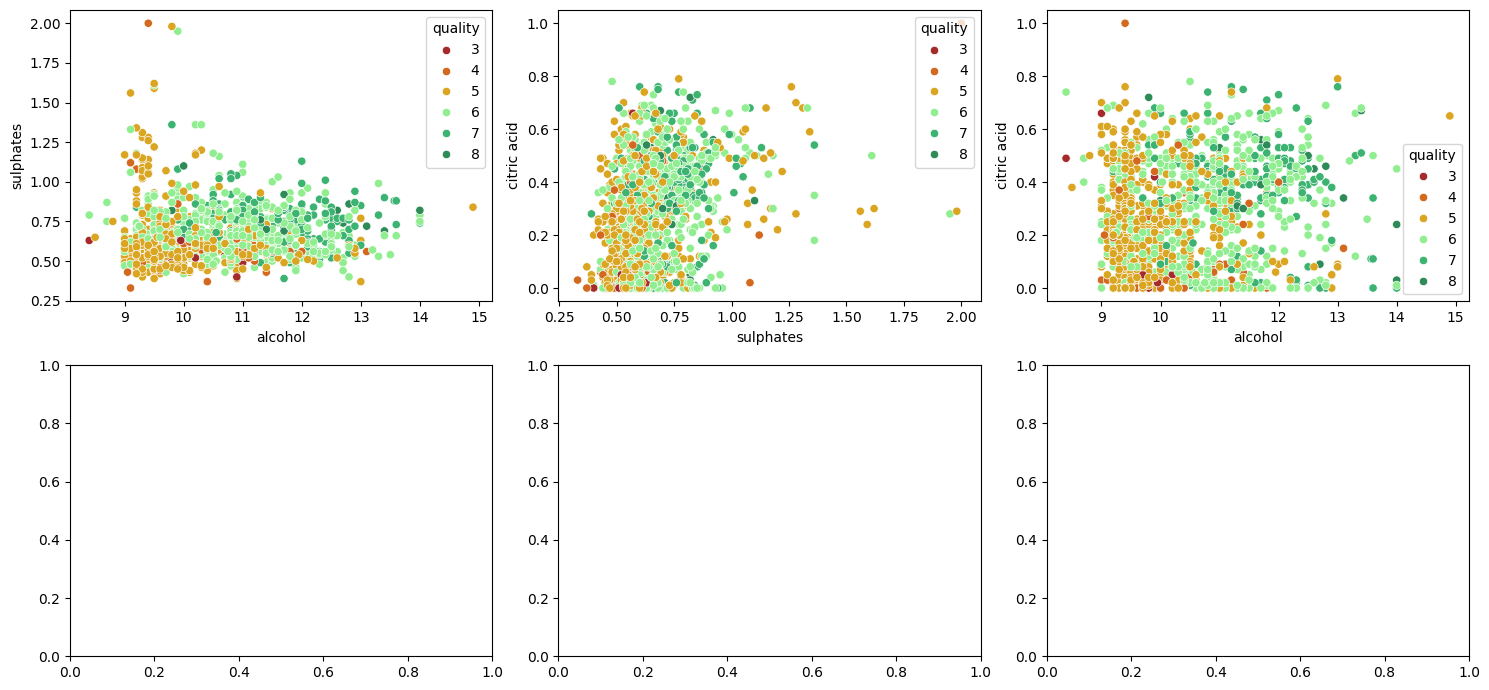

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(15, 7))

palette = [
    "#A52A2A",
    "#D2691E",
    "#DAA520",
    "#90EE90",
    "#3CB371",
    "#2E8B57",
]
sns.scatterplot(
    ax=axis[0, 0],
    data=raw_data,
    x="alcohol",
    y="sulphates",
    hue="quality",
    palette=palette,
)
sns.scatterplot(
    ax=axis[0, 1],
    data=raw_data,
    x="sulphates",
    y="citric acid",
    hue="quality",
    palette=palette,
)
sns.scatterplot(
    ax=axis[0, 2],
    data=raw_data,
    x="alcohol",
    y="citric acid",
    hue="quality",
    palette=palette,
)
#
#sns.scatterplot(
#    ax=axis[1, 0],
#    data=raw_data,
#    x="alcohol",
#    y="citric acid",
#    hue="quality",
#    palette=palette,
#)
#sns.scatterplot(
#    ax=axis[1, 1],
#    data=raw_data,
#    x="sulphates",
#    y="petal width (cm)",
#    hue="quality",
#    palette=palette,
#)
#sns.scatterplot(
#    ax=axis[1, 2],
#    data=raw_data,
#    x="petal length (cm)",
#    y="petal width (cm)",
#    hue="quality",
#    palette=palette,
#)
#
plt.tight_layout()

plt.show()


## Initialization and training of model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_scal, y_train)
